### SVM

## SVM 정리

- 커널 서포트 벡터 머신은 입력데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
- 직선과 초평연은 유연하지 못하여 저차원 데이터 셋에서는 선형 모델이 매우 제한적
- 이를 유연하게 하기 위해선 특성끼리 곱하거나 거듭제곱을 통해 새로운 특성을 추가하는 것
- 즉 단순한 직선으로 분류를 하기에는 제한이 많이 되어 이 직선을 곡선으로 바꾸려는 것 인듯???

- 커널 기법 : 수학적 기교를 사용하여 새로운 특성을 많이 만들지 않고서도 고차원 분류기에서 학습시킬수 있도록 하는 방법
- 확장된 특성에 대한 데이터 포인트들의 거리를 계산한다.
- 다항식 커널, 가우시안 커널(RBF) 등이 있다.
- 가우시안 커널은 무한한 특성 공간에 매핑하는 것으로 설명하기 좀 더 어렵다. 모든 차수의 모든 다항식을 고려한다고 이해

- svm 은 훈련 데이터 포인트가 두클래스 사이의 결정경계를 구분하는데 얼마나 중요한지를 배우게 된다.
- 일반적으로 일부의 데이터만이 영향을 주며, 이 영향을 주는 데이터들은 클래스 사이의 경계에 위치한 데이터 포인트 들이다.(이를 서포트 백터라 부른다)

- 중요매개변수
- gamma(가우시안 터널에서), C
- gamma : 하나의 훈련 샘플이 미치는 영향의 범위를 결정함. 작은 값은 넓은 영역을 뜻하며 큰 값은 영향을 미치는 범위가 제한적
- C : 규제 매개변수, 각 포인트의 중요도를 제한한다.

1. 임포트 하기
    - from sklearn.svm import LinearSVC (선형 SVM 모델)
    - from sklearn.svm import SVC
    
2. 모델 적용하기
    2.1 테스트, 트레인 구분
    - X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
    
    2.2 모델 만들기
    - Linear_svm_ = LinearSVC().fit(X, y)
    - svm = SVC().fit(X,y)
        - SVC()에 매개변수로 kernel = 'rbf', C = num, gamma = num 등이 들어감

3. 모델 확인하기
    - Linear_svm_.coef_, Linear_svm_.intercept_
    - svm.dual_coef_
    - svm.support_vectors_
    - svc.score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(centers = 4, random_state = 8 )

In [4]:
y = y % 2

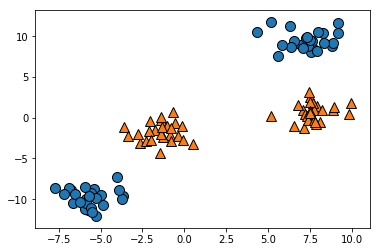

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [6]:
from sklearn.svm import LinearSVC

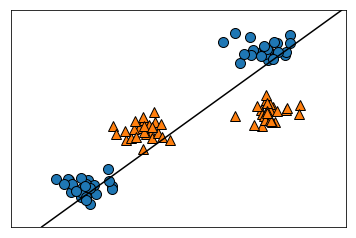

In [7]:
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [8]:
X_new = np.hstack([X, X[:, 1:]**2])
#''''stack arrays in sequence horizontally (column wise).
#Take a sequence of arrays and stack them horizontally to make
#a single array. Rebuild arrays divided by `hsplit`.''''

In [9]:
(X[:, 1] ** 2).shape

(100,)

In [10]:
X.shape

(100, 2)

In [11]:
X_new.shape

(100, 3)

In [12]:
a = np.array((1,2,3))
b = np.array((2,4,6))

In [13]:
a.shape

(3,)

In [14]:
b.shape

(3,)

In [15]:
np.hstack((a,b)).shape

(6,)

In [16]:
np.hstack([a,b[:]**2]).shape

(6,)

In [17]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [18]:
X_new[0,0]

-1.7216103645232577

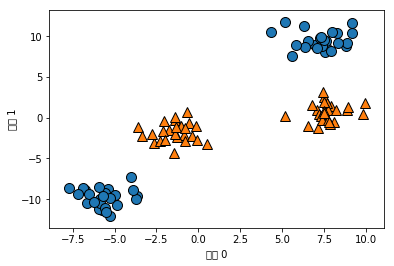

In [19]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

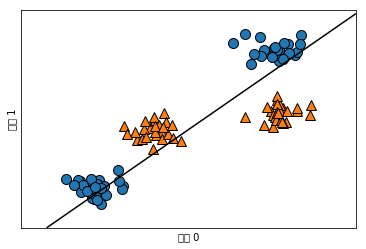

In [20]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

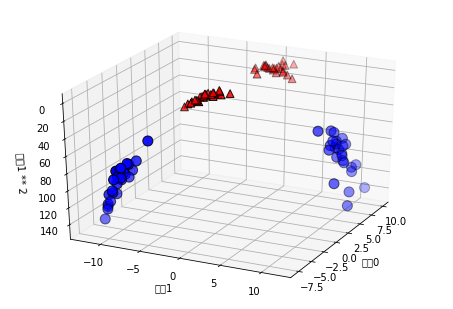

In [21]:
# 두 번째 특성을 제곱하여 추가합니다.
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0인 포인트를 먼저 그리고 그다음 y == 1인 포인트를 그립니다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=100, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

In [ ]:
mask.shape

In [ ]:
X_new.shape

In [ ]:
~mask

In [ ]:
y

In [ ]:
y == 0

In [ ]:
mask = 0
X_new[~mask]

In [ ]:
X_new[~mask, 1]

In [ ]:
X_new[mask, 1]

In [ ]:
pd.DataFrame(X_new)

In [25]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# ravel = return falattend array

In [ ]:
linear_svm_3d.coef_.shape

In [ ]:
coef.shape

In [ ]:
np.linspace(50, 60, 100).shape

In [ ]:
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspaace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

In [ ]:
np.meshgrid

In [ ]:
ZZ

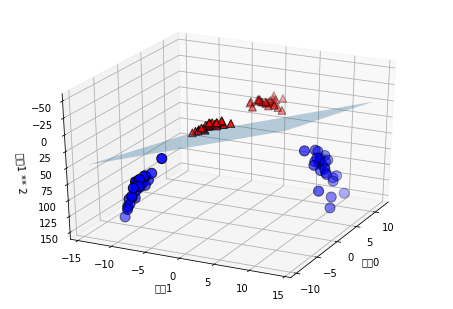

In [26]:
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)


ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=100, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

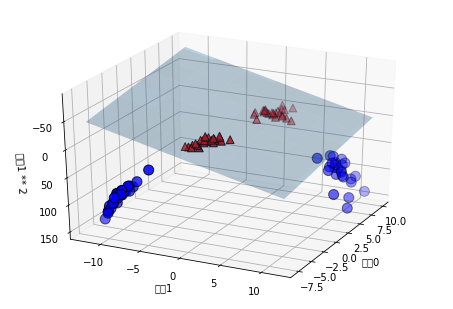

In [28]:
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() , X_new[:, 0].max() , 50)
yy = np.linspace(X_new[:, 1].min() , X_new[:, 1].max() , 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)


ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=100, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

In [30]:
XX.shape

(50, 50)

In [34]:
ax.plot_surface(XX,YY,ZZ)

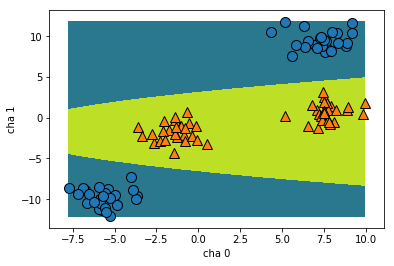

In [36]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()])#, dec.max()])#, cmap = mglearn.cm2, alphs = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('cha 0')
plt.ylabel('cha 1')

In [37]:
ZZ

array([[ 146.86548255,  146.86548255,  146.86548255, ...,  146.86548255,
         146.86548255,  146.86548255],
       [ 135.28162667,  135.28162667,  135.28162667, ...,  135.28162667,
         135.28162667,  135.28162667],
       [ 124.17355916,  124.17355916,  124.17355916, ...,  124.17355916,
         124.17355916,  124.17355916],
       ..., 
       [ 116.7514744 ,  116.7514744 ,  116.7514744 , ...,  116.7514744 ,
         116.7514744 ,  116.7514744 ],
       [ 127.52967148,  127.52967148,  127.52967148, ...,  127.52967148,
         127.52967148,  127.52967148],
       [ 138.78365693,  138.78365693,  138.78365693, ...,  138.78365693,
         138.78365693,  138.78365693]])

In [ ]:
dec.max()

In [44]:
from sklearn.svm import SVC

In [45]:
X, y = mglearn.tools.make_handcrafted_dataset()

In [54]:
svm.dual_coef_.shape

(1, 5)

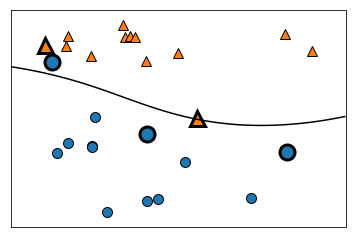

In [58]:
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps =.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)

In [61]:
X[:, 0].shape

(26,)

In [63]:
y.shape

(26,)

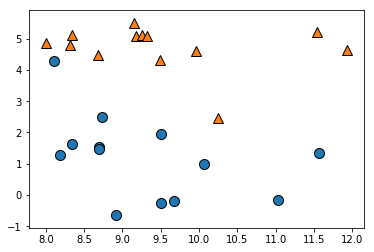

In [65]:
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)

#mglearn.plots.plot_2d_separator(svm, X, eps =.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

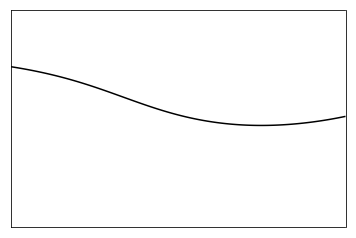

In [66]:
mglearn.plots.plot_2d_separator(svm, X, eps =.5)

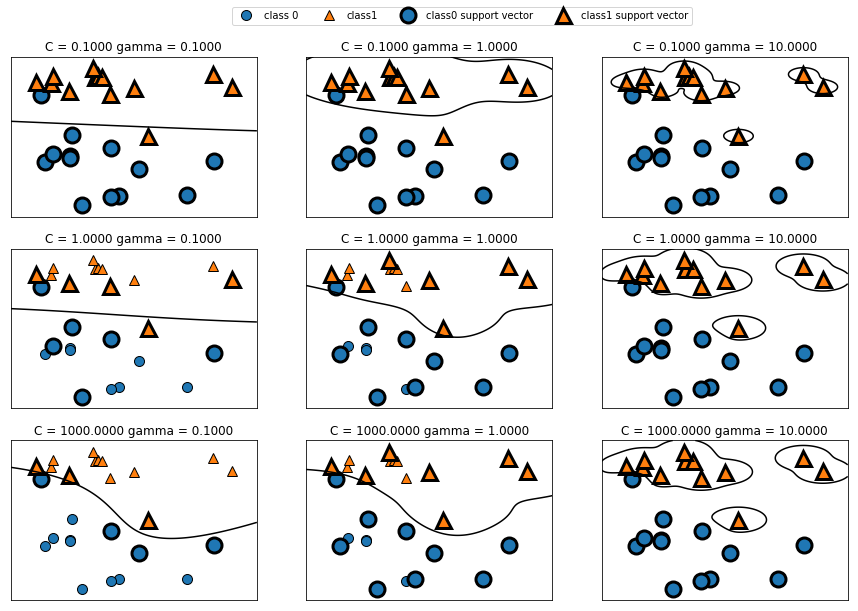

In [67]:
fig, axes = plt.subplots(3,3, figsize = (15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0,0].legend(['class 0', 'class1', 'class0 support vector', 'class1 support vector'], ncol = 4, loc = (.9, 1.2))

In [68]:
for ax, C in zip(axes, [-1,0,3]):
    print (ax, C)
    #for a, gamma in zip(ax, range(-1,2)):
        #mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

 <matplotlib.axes._subplots.AxesSubplot object at 0x0000026B2C851CC0>] -1
 <matplotlib.axes._subplots.AxesSubplot object at 0x0000026B2C35B390>] 0
 <matplotlib.axes._subplots.AxesSubplot object at 0x0000026B2C32F320>] 3


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.datasets import load_breast_cancer

In [75]:
cancer = load_breast_cancer()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [78]:
svc = SVC()
svc.fit(X_train, y_train)

print ('train score{}'.format(svc.score(X_train, y_train)))
print ('test score{}'.format(svc.score(X_test, y_test)))


train score1.0
test score0.6293706293706294


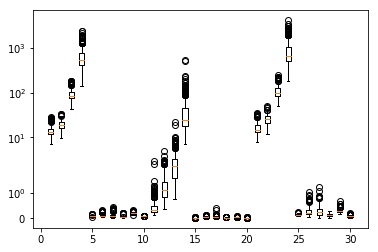

In [81]:
plt.boxplot(X_train, manage_xticks = False)
plt.yscale('symlog')


In [82]:
min_on_training = X_train.min(axis = 0)

In [91]:
range_on_training = (X_train - min_on_training).max(axis = 0)

X_train_scaled = (X_train - min_on_training) / range_on_training

print ('min \n {}'.format(X_train_scaled.min(axis = 0)))
print ('max \n {}'.format(X_train_scaled.max(axis = 0)))

min 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
max 
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [93]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print ('train score : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print ('test score : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

train score : 0.948
test score : 0.951


In [95]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print ('train score : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print ('test score : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

train score : 0.988
test score : 0.972


In [94]:
X_train.shape

(426, 30)

In [86]:
min_on_training.shape

(30,)

In [90]:
range_on_training.shape

(30,)